# Dimensionality Reduction: MCA & FAMD Assignment

In [1]:
import prince
import pandas as pd

### Import the HR data set 

In [2]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

In [3]:
data = pd.read_csv(data_url)

In [4]:
data.head()

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [5]:
data.select_dtypes(include='number')

,Age,Pay Rate,Zip,Days Employed
0,30,28.50,1450,3317
1,34,23.00,1460,1420
2,31,29.00,2703,1154
3,32,21.50,2170,58
4,30,16.56,2330,940
...,...,...,...,...
305,48,52.25,2056,289
306,36,51.00,1887,284
307,34,46.00,2045,284
308,30,45.00,2134,220


In [6]:
data2 = data.copy()
data2['Zip'] = data2['Zip'].map(lambda x: str(x))
data2.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                   object
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

### Pull out the categorical variables and note the dimensions of the data set.

In [7]:
cat = data2.select_dtypes(include='O')
cat.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [8]:
mca = prince.MCA(n_components=2)
mca.fit(cat)
coordinates = mca.transform(cat)
coordinates

,0,1
0,0.078186,0.184740
1,0.305220,0.204745
2,0.123229,0.297340
3,0.031065,0.093611
4,0.264406,0.083649
...,...,...
305,-0.008525,1.925942
306,-0.039754,1.587259
307,-0.009292,1.524335
308,-0.030697,1.712307


### Plot the coordinates of each resulting dimension.

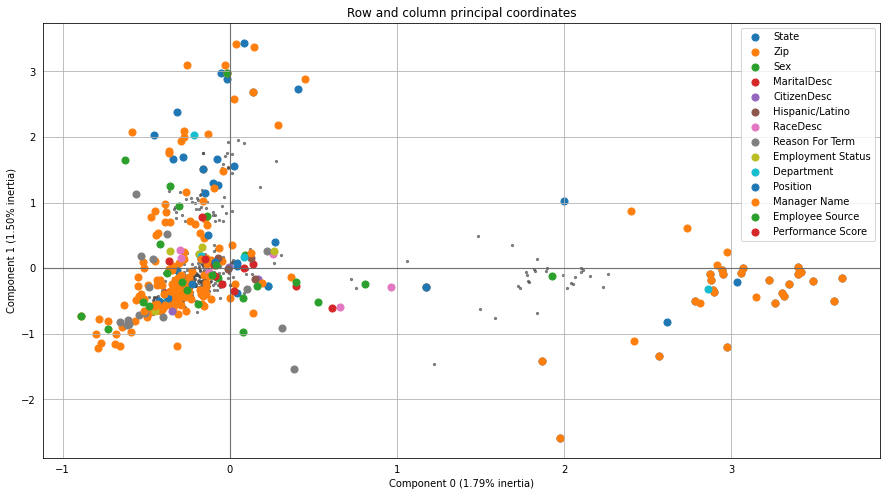

In [9]:
import matplotlib.pyplot as plt
mca.plot_coordinates(
    X=cat,
    ax=None,
    figsize=(15,8),
    row_points_size=5,
    show_row_points=True,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=False,
)
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [10]:
enc_cat = pd.get_dummies(cat, drop_first=True)
enc_cat.shape

(310, 299)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [11]:
ca = prince.CA()
ca.fit(enc_cat)
coordinates = ca.transform(enc_cat)
coordinates

,0,1
0,-0.004113,0.075618
1,0.360794,0.146209
2,0.022809,0.220271
3,-0.007237,-0.004906
4,0.271997,0.001754
...,...,...
305,-0.162586,2.034813
306,-0.177686,1.649675
307,-0.136968,1.556235
308,-0.165585,1.753277


### Plot the coordinates of each resulting dimension.

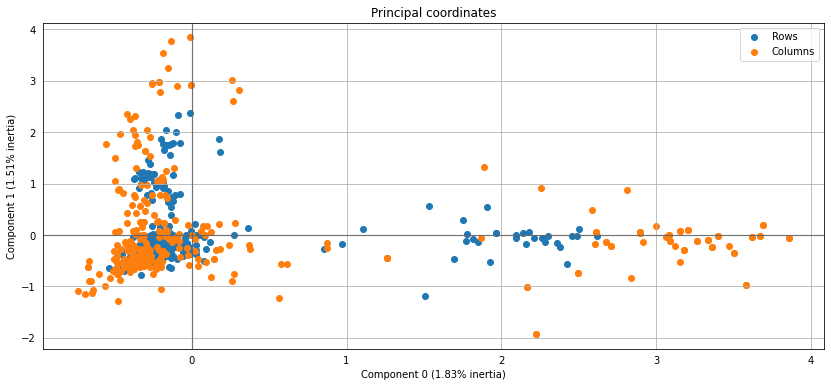

In [12]:
ca.plot_coordinates(
    X=enc_cat,
    ax=None,
    figsize=(14,6),
    show_row_labels=False,
    show_col_labels=False,
)
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [13]:
famd = prince.FAMD()
famd.fit(data2)
coordinates = famd.transform(data2)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

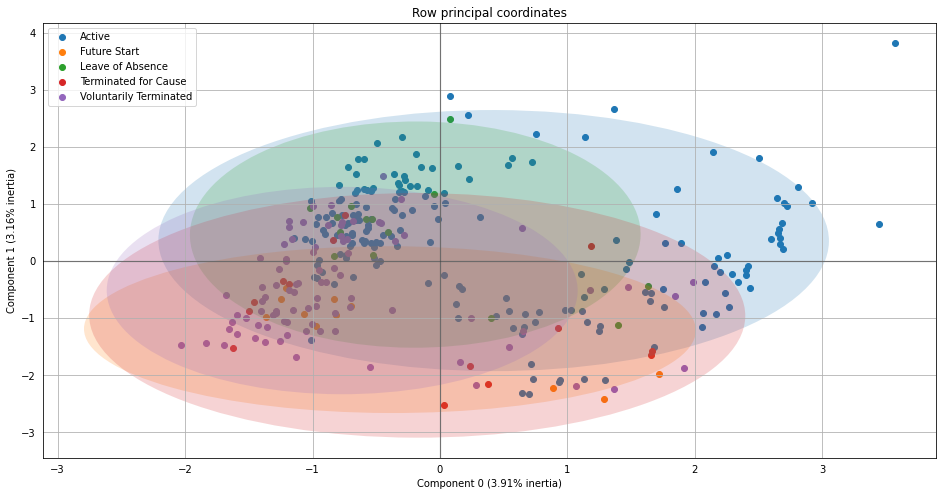

In [14]:
famd.plot_row_coordinates(
    data2,
    color_labels=data2['Employment Status'],
    ellipse_fill=True,
    figsize=(16, 8)
)
plt.show()